# Pulling Data

Use three months of data from Seattle, Oakland, and Louisville
- start date of "2022-09-01"
- end date of "2022-12-01"

In [1]:
from cdp_data import CDPInstances, datasets
import pandas as pd

In [2]:
# Get a dataset of "city council sessions" for Seattle 2022-09-01 to 2022-12-01
seattle_transcripts_sep_2022_to_dec_2022 = datasets.get_session_dataset(
    CDPInstances.Seattle,  # specify the city (or county) council we want data from
    start_datetime="2022-09-01",  # YYYY-MM-DD format
    end_datetime="2022-12-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)

# Get a dataset of "city council sessions" for Oakland 2022-09-01 to 2022-12-01
oakland_transcripts_sep_2022_to_dec_2022 = datasets.get_session_dataset(
    CDPInstances.Oakland,  # specify the city (or county) council we want data from
    start_datetime="2022-09-01",  # YYYY-MM-DD format
    end_datetime="2022-12-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)

# Get a dataset of "city council sessions" for Louisville 2022-09-01 to 2022-12-01
louisville_transcripts_sep_2022_to_dec_2022 = datasets.get_session_dataset(
    CDPInstances.Louisville,  # specify the city (or county) council we want data from
    start_datetime="2022-09-01",  # YYYY-MM-DD format
    end_datetime="2022-12-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)

Fetching each model attached to event_ref:   0%|          | 0/17 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/17 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 17it [00:08,  1.95it/s]


Fetching each model attached to event_ref:   0%|          | 0/18 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/18 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 18it [00:09,  1.91it/s]


Fetching each model attached to event_ref:   0%|          | 0/77 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/77 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 77it [00:33,  2.27it/s]


# Recognizing NERs using SpaCy and some data processing

Named entity types:
- "PERSON": "People, including fictional"
- "ORG": "Companies, agencies, institutions, etc."
- "NORP": "Nationalities or religious or political groups"

Use the label "PERSON" to identify people references, "ORG" to identify organization references, and "NORP" to identify special interest groups references.

Filter out sentences that have missing values by dropping rows where the 'text' column is NaN.

In [3]:
import spacy 

nlp_spacy = spacy.load("en_core_web_sm")

# The NERs we are interested in
ners = ['PERSON', 'ORG', 'NORP']

### Seattle 

`seattle_sentences_session_df` contains all sentence data across all sessions in Seattle.

`seattle_df` contains all recognized entities from all sentence data across all sessions in Seattle.

In [4]:
seattle_rows = []
seattle_sentences_session_df = {}

for i, session in seattle_transcripts_sep_2022_to_dec_2022.iterrows():
    
    seattle_sentences_df = pd.read_csv(session.transcript_as_csv_path)
    # drop rows if text column is empty
    seattle_sentences_df = seattle_sentences_df.dropna(subset=["text"]).reset_index()
    
    # to keep session_id information associated with each sentence,
    # create another dataframe with session_id column
    seattle_sentences_session_df[session.transcript_as_csv_path] = seattle_sentences_df.assign(session_id = session.id)
    
    
    for t in seattle_sentences_df.index:
        doc = nlp_spacy(seattle_sentences_df.text[t])
        for ent in doc.ents:
            if ent.label_ in ners:
                seattle_rows.append([session.id, t, ent.label_, ent.text, 'Seattle'])
    
            
seattle_df = pd.DataFrame(seattle_rows, columns=["session_id", "sentence_index", "named_entity_type", "entity", "city"])

### Oakland

`oakland_sentences_session_df` contains all sentence data across all sessions in Oakland.

`oakland_df` contains all recognized entities from all sentence data across all sessions in Oakland.

In [5]:
oakland_rows = []
oakland_sentences_session_df = {}

for i, session in oakland_transcripts_sep_2022_to_dec_2022.iterrows():
    
    oakland_sentences_df = pd.read_csv(session.transcript_as_csv_path)
    # drop rows if text column is empty
    oakland_sentences_df = oakland_sentences_df.dropna(subset=["text"]).reset_index()

    # to keep session_id information associated with each sentence, 
    # create another dataframe with session_id column
    oakland_sentences_session_df[session.transcript_as_csv_path] = oakland_sentences_df.assign(session_id = session.id)
        
    for t in oakland_sentences_df.index:
        doc = nlp_spacy(oakland_sentences_df.text[t])
        for ent in doc.ents:
            if ent.label_ in ners:
                oakland_rows.append([session.id, t, ent.label_, ent.text, 'Oakland'])


oakland_df = pd.DataFrame(oakland_rows, columns=["session_id", "sentence_index", "named_entity_type", "entity", "city"])

### Louisville

`louisville_sentences_session_df` contains all sentence data across all sessions in Louisville.

`louisville_df` contains all recognized entities from all sentence data across all sessions in Louisville.

In [37]:
louisville_rows = []
louisville_sentences_session_df = {}

for i, session in louisville_transcripts_sep_2022_to_dec_2022.iterrows():
    
    louisville_sentences_df = pd.read_csv(session.transcript_as_csv_path)
    # drop rows if text column is empty
    louisville_sentences_df = louisville_sentences_df.dropna(subset=["text"]).reset_index()
    
    # to keep session_id information associated with each sentence, 
    # create another dataframe with session_id column
    louisville_sentences_session_df[session.transcript_as_csv_path] = louisville_sentences_df.assign(session_id = session.id)

    for t in louisville_sentences_df.index:
        doc = nlp_spacy(louisville_sentences_df.text[t])
        for ent in doc.ents:
            if ent.label_ in ners:
                louisville_rows.append([session.id, t, ent.label_, ent.text, 'Louisville'])


louisville_df = pd.DataFrame(louisville_rows, columns=["session_id", "sentence_index", "named_entity_type", "entity", "city"])

# Combining all NER results and all sentence data

- Combined `seattle_df`, `oakland_df`, and `louisville_df` into 1 dataframe `all_cities_df`.

- Combined `seattle_sentences_session_df`, `oakland_sentences_session_df`, and `louisville_sentences_session_df` into 1 dataframe `all_cities_sentences_df`.


`all_cities_sentences_df` contains all sentences for all cities.

`all_cities_df` contains all NER results for all cities.

In [27]:
seattle_sentences_session_df = pd.concat(seattle_sentences_session_df)
oakland_sentences_session_df = pd.concat(oakland_sentences_session_df)
louisville_sentences_session_df = pd.concat(louisville_sentences_session_df)

all_cities_df = pd.concat([seattle_df, oakland_df, louisville_df])

all_cities_sentences_df = pd.concat([seattle_sentences_session_df, 
                                     oakland_sentences_session_df, 
                                     louisville_sentences_session_df])

# Normalization

Normalize data to understand which part of the meeting the references appears:

- Divide index by total number of sentences to get the percentage of meeting where sentence appears

- Add a new column 'percentages' to `all_cities_df` indicating when an entity is recognized in the meeting.

In [31]:
# total_sentences_df stores the total_sentences for each session_id (for all cities)
total_sentences_df = all_cities_sentences_df.groupby(['session_id'])['index'].count().to_frame()
total_sentences_df = total_sentences_df.rename({"index": "total_sentences"}, axis=1)

total_sentences_df

,total_sentences
session_id,
00298c246cfe,270
01f258e3e7c9,592
044b13b7811a,391
09cc8bb18681,161
0b73859e8b6a,567
...,...
e9bdfa228805,128
ebf9ee5aaee3,1028
f19af512dd71,422


In [32]:
# add a new column to all_cities_df 'percentages' indicating when an entity is recognized in the meeting.
percentages = []
for i, row in all_cities_df.iterrows():  
    # Divide index by total number of sentences
    percentages.append(row['sentence_index']/total_sentences_df.loc[row.session_id]['total_sentences'])


all_cities_df["percentage"] = percentages 
all_cities_df

,session_id,sentence_index,named_entity_type,entity,city,percentage
0,76bba31aaf85,1,PERSON,Alex Pedersen,Seattle,0.001054
1,76bba31aaf85,7,PERSON,Councilmember Sawant,Seattle,0.007376
2,76bba31aaf85,13,PERSON,Greg Spotts,Seattle,0.013699
3,76bba31aaf85,13,ORG,Seattle transportation Department,Seattle,0.013699
4,76bba31aaf85,14,PERSON,Spotts,Seattle,0.014752
...,...,...,...,...,...,...
16584,3b14573b464b,2272,NORP,Asian,Louisville,0.990842
16585,3b14573b464b,2272,ORG,LBD,Louisville,0.990842
16586,3b14573b464b,2282,ORG,Committee,Louisville,0.995203
16587,3b14573b464b,2282,PERSON,Arthur,Louisville,0.995203


In [ ]:
# exporting all_cities_df to a csv
#all_cities_df.to_csv('all_cities_data.csv') 

# Plots

## When are Special Interest Groups (SIGs) referenced during meetings?

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from heapq import nlargest
import numpy as np

### histogram

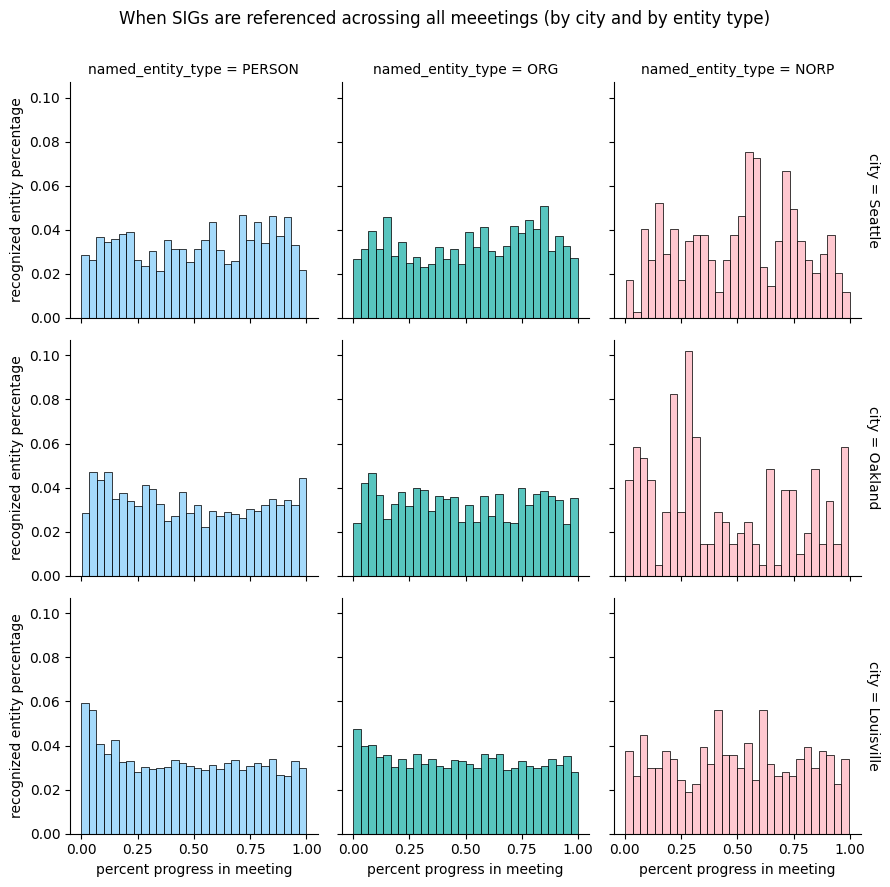

In [33]:
custom_palette = ["#87CEFA", "#20B2AA", "#FFB6C1"]

g = sns.FacetGrid(all_cities_df, row="city", col="named_entity_type", margin_titles=True, 
                  hue="named_entity_type", palette=custom_palette)
g.map_dataframe(sns.histplot, x="percentage", stat="proportion", bins=30)
_ = g.set_axis_labels("percent progress in meeting", "recognized entity percentage")
_ = g.fig.subplots_adjust(top=0.9)
_ = g.fig.suptitle("When SIGs are referenced acrossing all meeetings (by city and by entity type)")

### stacked histogram (for each city)

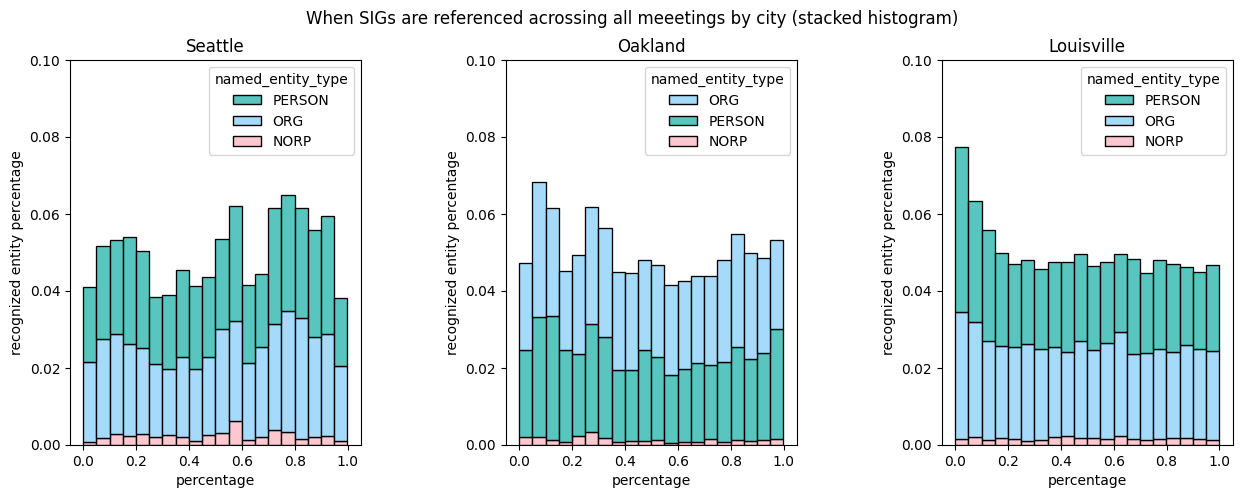

<Figure size 640x480 with 0 Axes>

In [34]:
fig, a = plt.subplots(1, 3, figsize=(15, 5))
_ = fig.subplots_adjust(wspace=0.5)

_ = f = plt.figure()


_ = sns.histplot(data=all_cities_df[all_cities_df['city'] == 'Seattle'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[0], palette=["#20B2AA", "#87CEFA", "#FFB6C1"])

_ = sns.histplot(data=all_cities_df[all_cities_df['city'] == 'Oakland'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[1], palette=["#87CEFA", "#20B2AA", "#FFB6C1"])

_ = sns.histplot(data=all_cities_df[all_cities_df['city'] == 'Louisville'], 
                 stat="proportion", multiple="stack", 
                 x='percentage', bins=20,
                 hue="named_entity_type", ax=a[2], palette=["#20B2AA", "#87CEFA", "#FFB6C1"])

a[0].set_ylabel("recognized entity percentage")
a[1].set_ylabel("recognized entity percentage")
a[2].set_ylabel("recognized entity percentage")

a[0].set_title("Seattle")
a[1].set_title("Oakland")
a[2].set_title("Louisville")

a[0].set(ylim=(0, 0.1))
a[1].set(ylim=(0, 0.1))
a[2].set(ylim=(0, 0.1))

_ = fig.suptitle("When SIGs are referenced acrossing all meeetings by city (stacked histogram)")

## What are the top entities mentioned on average across all meetings?


Find the first 20 most frequently appeared words for all entity types/for each entity type and create a bar chart.

`filterlist` includes all entities that can be removed.

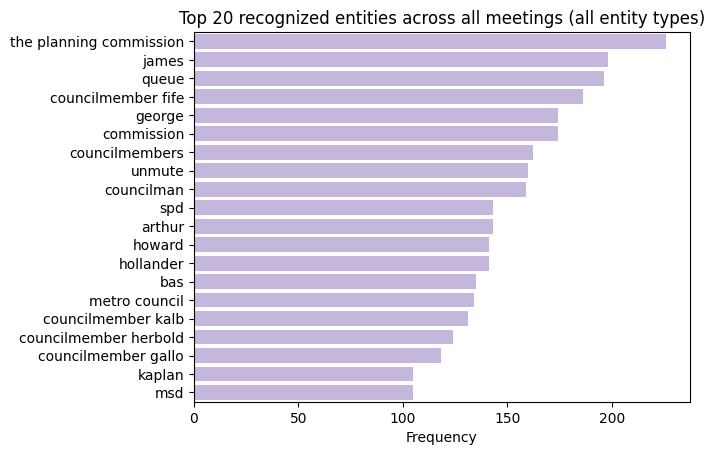

In [41]:
# Count the frequency of each recognized entity 
# and make a barplot of top 20 recognized entities across all meetings for all entity types.

word_count = {}

# a list of eneities that we want to filter out
filterlist = ['council', 'madam', 'committee', 'department']

for e in all_cities_df["entity"]:
    if e.lower() in word_count and e.lower() not in filterlist:
        word_count[e.lower()] += 1
    else:
        word_count[e.lower()] = 1

most_appeared = dict(nlargest(20, word_count.items(), key=lambda i: i[1]))

df = pd.DataFrame(list(most_appeared.items()), columns=['word', 'freq'])

ax = sns.barplot(x='freq', y='word', data=df, color="#C3B1E1")
_ = ax.set_ylabel("")
_ = ax.set_xlabel("Frequency")
_ = ax.set_title("Top 20 recognized entities across all meetings (all entity types)")

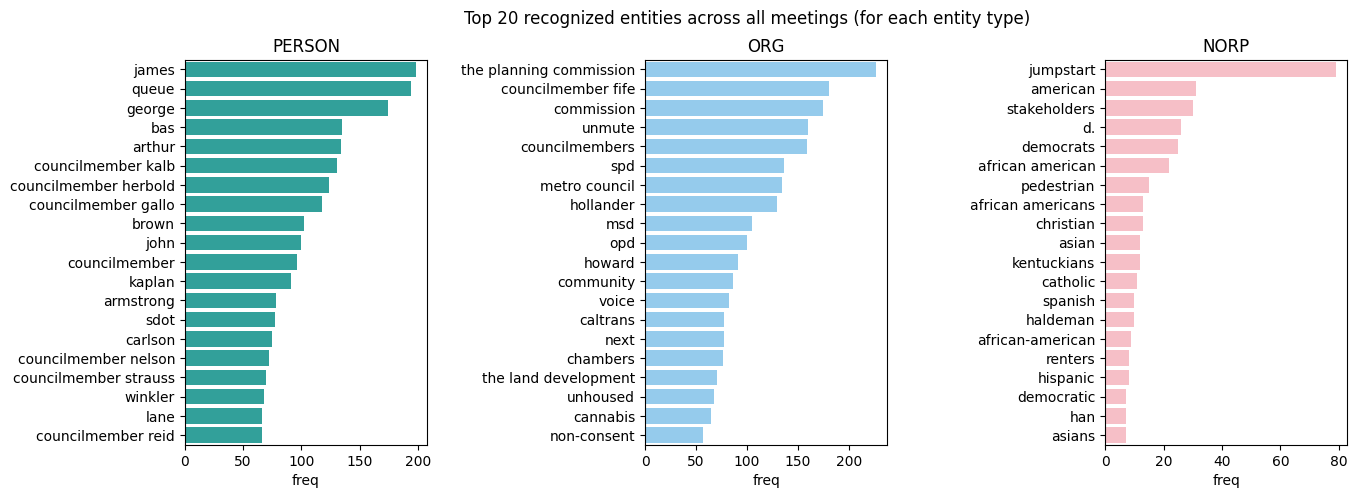

In [45]:
# Count the frequency of each recognized entity 
# and make a barplot of top 20 recognized entities across all meetings for each entity type.


# result_df stores top 20 entities mentioned on average across all meetings in all cities by entity type
result_df = pd.DataFrame([], columns=["word", "freq", "named_entity_type"])
biglist = []


for entity_type in all_cities_df['named_entity_type'].unique():
    word_count_for1type = {}
    all_cities_df_for1type = all_cities_df[all_cities_df['named_entity_type'] == entity_type]

    # a list of eneities that we want to filter out
    filterlist = ['council', 'madam', 'councilman', 'committee', 'department']

    for e in all_cities_df_for1type["entity"]:
        if e.lower() in word_count_for1type and e.lower() not in filterlist:
            word_count_for1type[e.lower()] += 1
        else:
            word_count_for1type[e.lower()] = 1
    
    most_appeared_for1type = dict(nlargest(20, word_count_for1type.items(), key=lambda i: i[1]))
    
    df_for1type = pd.DataFrame(list(most_appeared_for1type.items()))
    df_for1type["named_entity_type"] = entity_type

    
    biglist.append(df_for1type)

    
result_df = pd.concat(biglist).rename({0: "word", 1: "freq"}, axis=1).reset_index(drop=True)

# plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.9)


_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'PERSON'], ax=ax[0], color="#20B2AA")
_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'ORG'], ax=ax[1], color="#87CEFA")
_ = sns.barplot(x="freq", y='word', data=result_df[result_df["named_entity_type"] == 'NORP'], ax=ax[2], color="#FFB6C1")

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_title("PERSON")
ax[1].set_title("ORG")
ax[2].set_title("NORP")

fig.suptitle("Top 20 recognized entities across all meetings (for each entity type)")

plt.show()